<a href="https://www.kaggle.com/code/mh0386/medical-insurance-cost-prediction?scriptVersionId=120955316" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [314]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import statsmodels.api as sm

# The Data

In [315]:
data = pd.read_csv('/kaggle/input/insurance/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Null Values

In [316]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [317]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


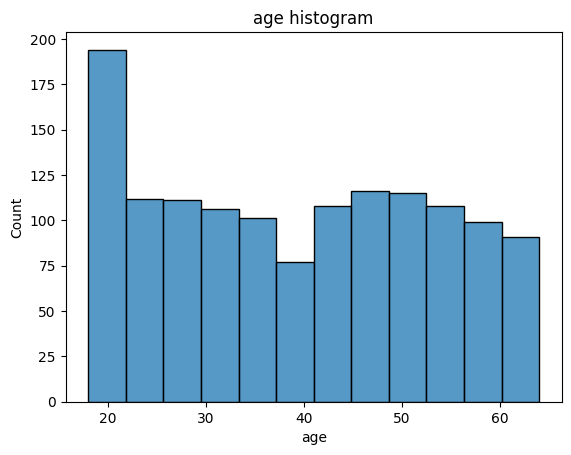

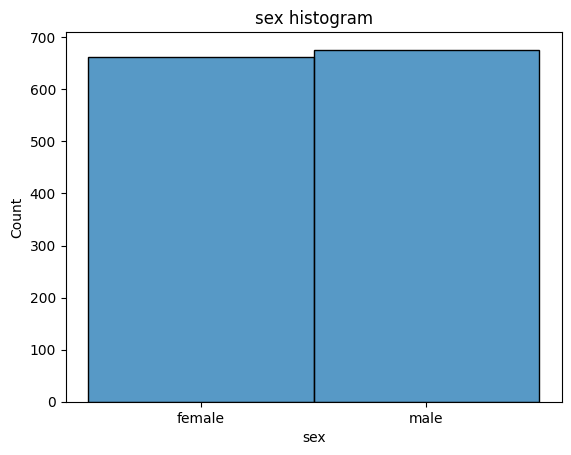

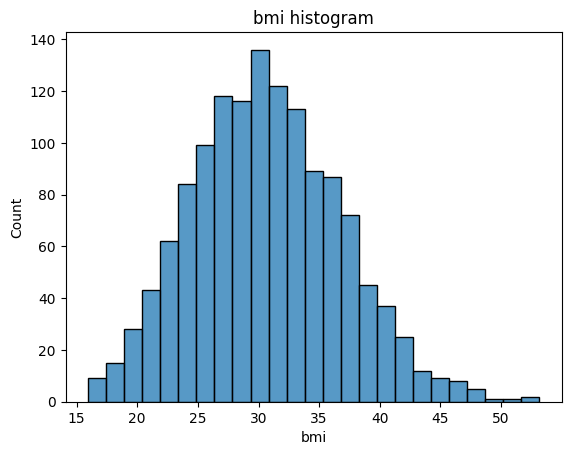

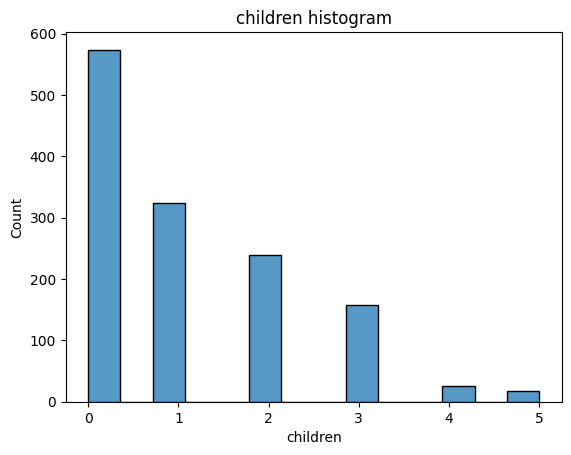

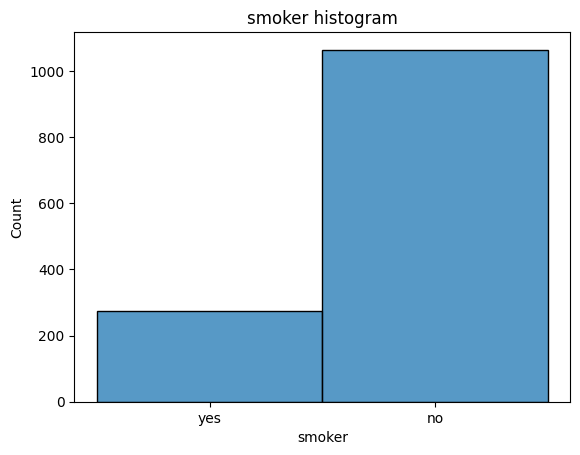

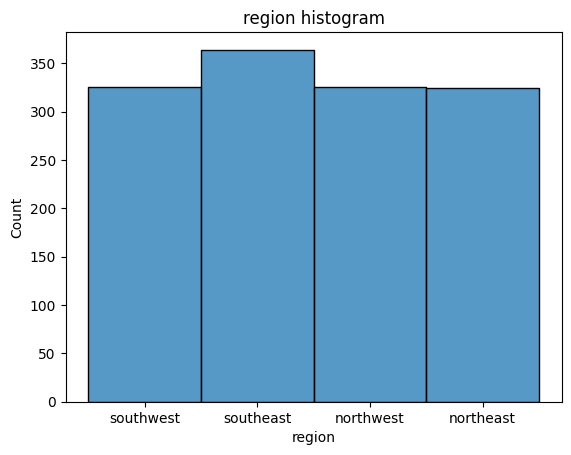

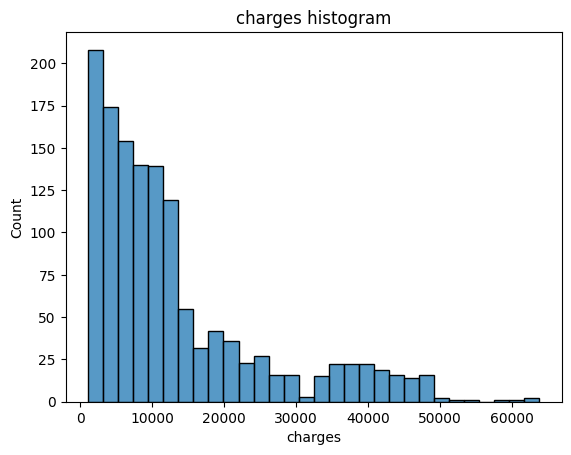

In [318]:
for col in data.columns:
  fig, ax = plt.subplots()
  plt.title(f'{col} histogram')
  sns.histplot(data=data, x=col, ax=ax)
  plt.show()

In [319]:
data.smoker = le.fit_transform(data.smoker)
data.sex = le.fit_transform(data.sex)
data.region = le.fit_transform(data.region)
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [320]:
#data.info()

# Split the data to train and test data

In [321]:
Y = data.charges
data.drop('charges', axis=1, inplace=True)
X = np.asarray(data)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size= 0.20, random_state=42)

# Perform Data Scaling using Robust Scaler

In [322]:
rs = RobustScaler()
X_Train = rs.fit_transform(X_Train)
X_Test = rs.fit_transform(X_Test)

# Linear Regression Model

In [323]:
Model = linear_model.LinearRegression()
Model.fit(X_Train, Y_Train)

LinearRegression()

In [324]:
Model.score(X_Train, Y_Train)

0.7417049283233981

In [325]:
Model.score(X_Test, Y_Test)

0.7827494810875837

In [326]:
Y_Pred = Model.predict(X_Test)
Y_Test_Pred = pd.DataFrame({"Y_Test": Y_Test, "Y_Pred": Y_Pred})
Y_Test_Pred.head()

,Y_Test,Y_Pred
764,9095.06825,9152.214304
887,5272.17580,7298.798889
890,29330.98315,37120.831220
1293,9301.89355,9730.351964
259,33750.29180,27178.087923


In [327]:
Y_Test_Pred = Y_Test_Pred.reset_index()

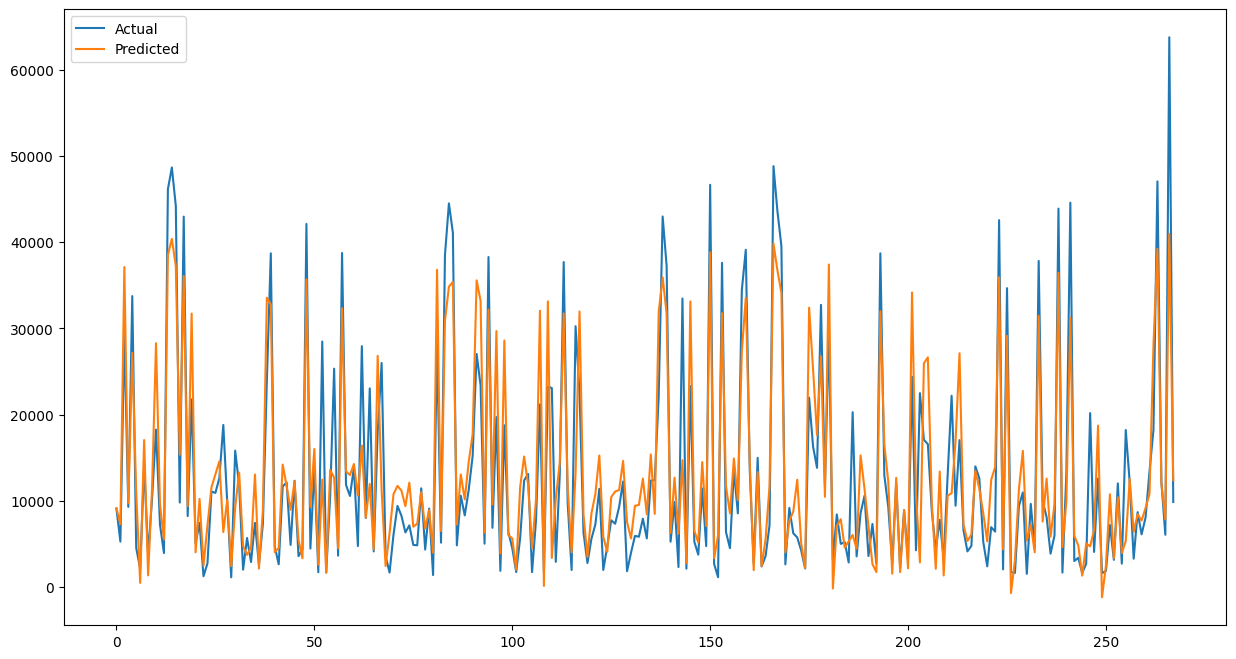

In [328]:
plt.figure(figsize=(15, 8))
Y_Test_Pred = Y_Test_Pred.drop(["index"], axis=1)
plt.plot(Y_Test_Pred)
plt.legend(["Actual", "Predicted"])

In [329]:
reg_score = r2_score(Y_Test , Y_Pred)
reg_score

0.7827494810875837

In [330]:
mse = mean_squared_error(Y_Test , Y_Pred)
print("mse: ", mse)
mape = mean_absolute_percentage_error(Y_Test , Y_Pred)
print("mape: ", mape)
mae = mean_absolute_error(Y_Test , Y_Pred)
print("mae: ", mae)
reg_mse = mean_squared_error(Y_Test , Y_Pred)
reg_rmse  = np.sqrt(reg_mse)
print("reg_mse: ", reg_rmse)

mse:  33727867.47708217
mape:  0.47961037235516685
mae:  4217.6864131681605
reg_mse:  5807.569842634884


In [331]:
X2 = sm.add_constant(X_Train)
est = sm.OLS(Y_Train , X2)
est2 = est.fit()

In [332]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     508.7
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          2.71e-308
Time:                        19:38:34   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1063   BIC:                         2.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8214.8062    297.536     27.609      0.000    7630.982    8798.630
x1          6169.3503    322.844     19.109      0.000    5535.867    6802.834
x2           -18.7915    375.770     -0.050      0.960    -756.126     718.543
x3          2784.0483    262.461     10.607      0.000    2269.048    3299.049
x4           850.1829    308.862      2.753      0.006     244.134    1456.232
x5          2.365e+04    465.245     50.829      0.000    2.27e+04    2.46e+04
x6          -271.2843    170.373     -1.592      0.112    -605.590      63.022
==============================================================================
Omnibus:                      251.823   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              611.548
Skew:                           1.251   Prob(JB):                    1.60e-133
Kurtosis:                       5.731   Cond. No.                         3.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""